# **TODOs**

* apply GA for best rules selection or membership function creation

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from db import init
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

## **DB Ops**

In [2]:
db = init()
q = "CREATE TABLE IF NOT EXISTS drugs_info (id int, name text, amount int)"
db.query(q,[])

# for i in range(50):
#     q = "INSERT INTO drugs_info VALUES (?, ?, ?)"
#     v = [i, f'cit_{i}', np.random.randint(101)]
#     db.query(q,v)

q  = "select * from drugs_info"
drugs = db.query(q,[])
drugs.fetchall()

[(0, 'cit_0', 66),
 (1, 'cit_1', 63),
 (2, 'cit_2', 60),
 (3, 'cit_3', 66),
 (4, 'cit_4', 58),
 (5, 'cit_5', 82),
 (6, 'cit_6', 64),
 (7, 'cit_7', 70),
 (8, 'cit_8', 24),
 (9, 'cit_9', 19),
 (10, 'cit_10', 40),
 (11, 'cit_11', 0),
 (12, 'cit_12', 36),
 (13, 'cit_13', 43),
 (14, 'cit_14', 68),
 (15, 'cit_15', 13),
 (16, 'cit_16', 65),
 (17, 'cit_17', 23),
 (18, 'cit_18', 28),
 (19, 'cit_19', 16),
 (20, 'cit_20', 71),
 (21, 'cit_21', 29),
 (22, 'cit_22', 62),
 (23, 'cit_23', 80),
 (24, 'cit_24', 1),
 (25, 'cit_25', 29),
 (26, 'cit_26', 64),
 (27, 'cit_27', 70),
 (28, 'cit_28', 17),
 (29, 'cit_29', 79),
 (30, 'cit_30', 13),
 (31, 'cit_31', 54),
 (32, 'cit_32', 98),
 (33, 'cit_33', 81),
 (34, 'cit_34', 99),
 (35, 'cit_35', 80),
 (36, 'cit_36', 61),
 (37, 'cit_37', 61),
 (38, 'cit_38', 20),
 (39, 'cit_39', 67),
 (40, 'cit_40', 48),
 (41, 'cit_41', 68),
 (42, 'cit_42', 58),
 (43, 'cit_43', 79),
 (44, 'cit_44', 32),
 (45, 'cit_45', 47),
 (46, 'cit_46', 66),
 (47, 'cit_47', 81),
 (48, 'cit_48'

## **Membership Function Generator**

---

📋 *References*:

➱ [Membership Functions](http://www.dma.fi.upm.es/recursos/aplicaciones/logica_borrosa/web/fuzzy_inferencia/funpert_en.htm)

➱ [Gaussian](https://github.com/scikit-fuzzy/scikit-fuzzy/blob/eecf303b701e3efacdc9b9066207ef605d4facaa/skfuzzy/membership/generatemf.py#L65)

In [26]:
def gaussmf(x, mean, sigma):
    return np.exp(-((x - mean)**2.) / (2 * sigma**2.))

## **Normalizing Universe Range**

In [47]:

scaler = MinMaxScaler()
universe = scaler.fit_transform(np.arange(0, 101, 1).reshape(-1, 1)).reshape(1, -1)[0]

## **Antecedent - Current Drugs**

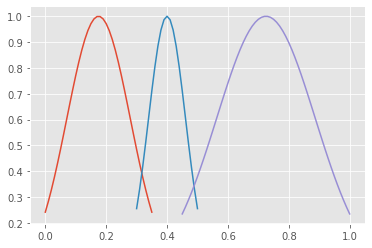

In [35]:

X = {"low": None, "medium": None, "high": None}

X_ranges = [
                {"universe": universe[0:36], "mf": None},  # low
                {"universe": universe[30:51], "mf": None}, # medium
                {"universe": universe[45:101], "mf": None} # high
           ]


# -------------------------------
# generating membership functions
# -------------------------------


# generating mf for low fuzzy set
X_ranges[0]["mf"] = gaussmf(
                X_ranges[0]["universe"], # independent variable - universe of low fuzzy set
                np.mean(X_ranges[0]["universe"]), # mean of universe of low fuzzy set
                np.std(X_ranges[0]["universe"]) # std of universe of low fuzzy set
            )



# generating mf for medium fuzzy set
X_ranges[1]["mf"] = gaussmf(
                X_ranges[1]["universe"], # independent variable - universe of medium fuzzy set
                np.mean(X_ranges[1]["universe"]), # mean of universe of medium fuzzy set
                np.std(X_ranges[1]["universe"]) # std of universe of medium fuzzy set
            )


# generating mf for high fuzzy set
X_ranges[2]["mf"] = gaussmf(
                X_ranges[2]["universe"], # independent variable - universe of high fuzzy set
                np.mean(X_ranges[2]["universe"]), # mean of universe of high fuzzy set
                np.std(X_ranges[2]["universe"]) # std of universe of high fuzzy set
            )



X["low"]    = X_ranges[0]
X["medium"] = X_ranges[1]
X["high"]   = X_ranges[2]


# -----------------------------
# plotting membership functions
# -----------------------------

plt.plot(X["low"]["universe"], X["low"]["mf"])
plt.plot(X["medium"]["universe"], X["medium"]["mf"])
plt.plot(X["high"]["universe"], X["high"]["mf"])

## **Antecedent - Drugs Sales over the Past Month**

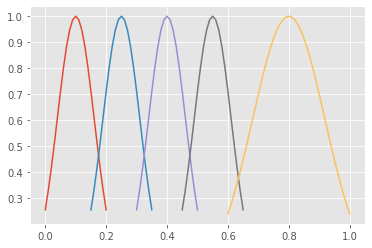

In [36]:

Y = {"very_few": None, "few": None, "medium": None, "many": None, "alot": None}

Y_ranges = [
                {"universe": universe[0:21], "mf": None},  # very_few
                {"universe": universe[15:36], "mf": None}, # few
                {"universe": universe[30:51], "mf": None}, # medium
                {"universe": universe[45:66], "mf": None}, # many
                {"universe": universe[60:101], "mf": None} # alot
           ]



# -------------------------------
# generating membership functions
# -------------------------------


# generating mf for very_few fuzzy set
Y_ranges[0]["mf"] = gaussmf(
                Y_ranges[0]["universe"], # independent variable - universe of very_few fuzzy set
                np.mean(Y_ranges[0]["universe"]), # mean of universe of very_few fuzzy set
                np.std(Y_ranges[0]["universe"]) # std of universe of very_few fuzzy set
            )



# generating mf for few fuzzy set
Y_ranges[1]["mf"] = gaussmf( 
                Y_ranges[1]["universe"], # independent variable - universe of few fuzzy set
                np.mean(Y_ranges[1]["universe"]), # mean of universe of few fuzzy set
                np.std(Y_ranges[1]["universe"]) # std of universe of few fuzzy set
            )



# generating mf for medium fuzzy set
Y_ranges[2]["mf"] = gaussmf(
                Y_ranges[2]["universe"], # independent variable - universe of medium fuzzy set
                np.mean(Y_ranges[2]["universe"]), # mean of universe of medium fuzzy set
                np.std(Y_ranges[2]["universe"]) # std of universe of medium fuzzy set              
            )



# generating mf for many fuzzy set
Y_ranges[3]["mf"] = gaussmf(
                Y_ranges[3]["universe"], # independent variable - universe of many fuzzy set
                np.mean(Y_ranges[3]["universe"]), # mean of universe of many fuzzy set
                np.std(Y_ranges[3]["universe"]) # std of universe of many fuzzy set
            )

    
    

# generating mf for alot fuzzy set
Y_ranges[4]["mf"] = gaussmf(
                Y_ranges[4]["universe"], # independent variable - universe of alot fuzzy set
                np.mean(Y_ranges[4]["universe"]), # mean of universe of alot fuzzy set
                np.std(Y_ranges[4]["universe"]) # std of universe of alot fuzzy set
            )




Y["very_few"] = Y_ranges[0]
Y["few"]      = Y_ranges[1]
Y["medium"]   = Y_ranges[2]
Y["many"]     = Y_ranges[3]
Y["alot"]     = Y_ranges[4]




# -----------------------------
# plotting membership functions
# -----------------------------

plt.plot(Y["very_few"]["universe"], Y["very_few"]["mf"])
plt.plot(Y["few"]["universe"], Y["few"]["mf"])
plt.plot(Y["medium"]["universe"], Y["medium"]["mf"])
plt.plot(Y["many"]["universe"], Y["many"]["mf"])
plt.plot(Y["alot"]["universe"], Y["alot"]["mf"])


## **Antecedent - Drugs Sales over the Past Years**

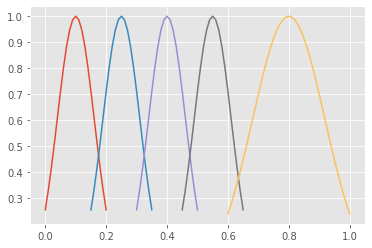

In [37]:

Z = {"very_few": None, "few": None, "medium": None, "many": None, "alot": None}

Z_ranges = [
                {"universe": universe[0:21], "mf": None},  # very_few
                {"universe": universe[15:36], "mf": None}, # few
                {"universe": universe[30:51], "mf": None}, # medium
                {"universe": universe[45:66], "mf": None}, # many
                {"universe": universe[60:101], "mf": None} # alot
           ]



# -------------------------------
# generating membership functions
# -------------------------------


# generating mf for very_few fuzzy set
Z_ranges[0]["mf"] = gaussmf(
                Z_ranges[0]["universe"], # independent variable - universe of very_few fuzzy set
                np.mean(Z_ranges[0]["universe"]), # mean of universe of very_few fuzzy set
                np.std(Z_ranges[0]["universe"]) # std of universe of very_few fuzzy set
            )



# generating mf for few fuzzy set
Z_ranges[1]["mf"] = gaussmf( 
                Z_ranges[1]["universe"], # independent variable - universe of few fuzzy set
                np.mean(Z_ranges[1]["universe"]), # mean of universe of few fuzzy set
                np.std(Z_ranges[1]["universe"]) # std of universe of few fuzzy set
            )



# generating mf for medium fuzzy set
Z_ranges[2]["mf"] = gaussmf(
                Z_ranges[2]["universe"], # independent variable - universe of medium fuzzy set
                np.mean(Z_ranges[2]["universe"]), # mean of universe of medium fuzzy set
                np.std(Z_ranges[2]["universe"]) # std of universe of medium fuzzy set              
            )



# generating mf for many fuzzy set
Z_ranges[3]["mf"] = gaussmf(
                Z_ranges[3]["universe"], # independent variable - universe of many fuzzy set
                np.mean(Z_ranges[3]["universe"]), # mean of universe of many fuzzy set
                np.std(Z_ranges[3]["universe"]) # std of universe of many fuzzy set
            )

    
    

# generating mf for alot fuzzy set
Z_ranges[4]["mf"] = gaussmf(
                Z_ranges[4]["universe"], # independent variable - universe of alot fuzzy set
                np.mean(Z_ranges[4]["universe"]), # mean of universe of alot fuzzy set
                np.std(Z_ranges[4]["universe"]) # std of universe of alot fuzzy set
            )




Z["very_few"] = Z_ranges[0]
Z["few"]      = Z_ranges[1]
Z["medium"]   = Z_ranges[2]
Z["many"]     = Z_ranges[3]
Z["alot"]     = Z_ranges[4]




# -----------------------------
# plotting membership functions
# -----------------------------

plt.plot(Z["very_few"]["universe"], Z["very_few"]["mf"])
plt.plot(Z["few"]["universe"], Z["few"]["mf"])
plt.plot(Z["medium"]["universe"], Z["medium"]["mf"])
plt.plot(Z["many"]["universe"], Z["many"]["mf"])
plt.plot(Z["alot"]["universe"], Z["alot"]["mf"])


## **Consequent - Amount of Order**

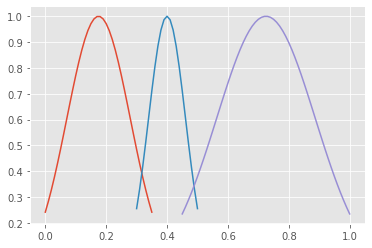

In [38]:

W = {"low": None, "medium": None, "high": None}

W_ranges = [
                {"universe": universe[0:36], "mf": None},  # low
                {"universe": universe[30:51], "mf": None}, # medium
                {"universe": universe[45:101], "mf": None} # high
           ]


# -------------------------------
# generating membership functions
# -------------------------------


# generating mf for low fuzzy set
W_ranges[0]["mf"] = gaussmf(
                W_ranges[0]["universe"], # independent variable - universe of low fuzzy set
                np.mean(W_ranges[0]["universe"]), # mean of universe of low fuzzy set
                np.std(W_ranges[0]["universe"]) # std of universe of low fuzzy set
            )



# generating mf for medium fuzzy set
W_ranges[1]["mf"] = gaussmf(
                W_ranges[1]["universe"], # independent variable - universe of medium fuzzy set
                np.mean(W_ranges[1]["universe"]), # mean of universe of medium fuzzy set
                np.std(W_ranges[1]["universe"]) # std of universe of medium fuzzy set
            )


# generating mf for high fuzzy set
W_ranges[2]["mf"] = gaussmf(
                W_ranges[2]["universe"], # independent variable - universe of high fuzzy set
                np.mean(W_ranges[2]["universe"]), # mean of universe of high fuzzy set
                np.std(W_ranges[2]["universe"]) # std of universe of high fuzzy set
            )



W["low"]    = W_ranges[0]
W["medium"] = W_ranges[1]
W["high"]   = W_ranges[2]


# -----------------------------
# plotting membership functions
# -----------------------------

plt.plot(W["low"]["universe"], W["low"]["mf"])
plt.plot(W["medium"]["universe"], W["medium"]["mf"])
plt.plot(W["high"]["universe"], W["high"]["mf"])




## **Rule Class - Fuzzy Rules Object**

In [39]:

class Rule:
    def __init__(self, left_c=None, operator="and", right_c=None, _then=None):
        self.left_c   = left_c
        self.operator = operator
        self.right_c  = right_c
        self._then = _then
        
        

## **Rules - Drugs Sales over the Past Month**

In [40]:

month_rules = []

month_rules.append(Rule(left_c=Y["alot"], operator="and", right_c=X["low"],    _then="high"))
month_rules.append(Rule(left_c=Y["alot"], operator="and", right_c=X["medium"], _then="high"))
month_rules.append(Rule(left_c=Y["alot"], operator="and", right_c=X["high"],   _then="high"))

month_rules.append(Rule(left_c=Y["many"], operator="and", right_c=X["low"],    _then="high"))
month_rules.append(Rule(left_c=Y["many"], operator="and", right_c=X["medium"], _then="high"))
month_rules.append(Rule(left_c=Y["many"], operator="and", right_c=X["high"],   _then="medium"))

month_rules.append(Rule(left_c=Y["medium"], operator="and", right_c=X["low"],    _then="high"))
month_rules.append(Rule(left_c=Y["medium"], operator="and", right_c=X["medium"], _then="medium"))
month_rules.append(Rule(left_c=Y["medium"], operator="and", right_c=X["high"],   _then="low"))

month_rules.append(Rule(left_c=Y["few"], operator="and", right_c=X["low"],    _then="medium"))
month_rules.append(Rule(left_c=Y["few"], operator="and", right_c=X["medium"], _then="low"))
month_rules.append(Rule(left_c=Y["few"], operator="and", right_c=X["high"],   _then="low"))

month_rules.append(Rule(left_c=Y["very_few"], operator="and", right_c=X["low"],    _then="low"))
month_rules.append(Rule(left_c=Y["very_few"], operator="and", right_c=X["medium"], _then="low"))
month_rules.append(Rule(left_c=Y["very_few"], operator="and", right_c=X["high"],   _then="low"))



## **Rules - Drugs Sales over the Past Years Rules**

In [41]:
 
years_rules = []

years_rules.append(Rule(left_c=Z["alot"], operator="and", right_c=X["low"],    _then="high"))
years_rules.append(Rule(left_c=Z["alot"], operator="and", right_c=X["medium"], _then="high"))
years_rules.append(Rule(left_c=Z["alot"], operator="and", right_c=X["high"],   _then="high"))

years_rules.append(Rule(left_c=Z["many"], operator="and", right_c=X["low"],    _then="high"))
years_rules.append(Rule(left_c=Z["many"], operator="and", right_c=X["medium"], _then="high"))
years_rules.append(Rule(left_c=Z["many"], operator="and", right_c=X["high"],   _then="medium"))

years_rules.append(Rule(left_c=Z["medium"], operator="and", right_c=X["low"],    _then="high"))
years_rules.append(Rule(left_c=Z["medium"], operator="and", right_c=X["medium"], _then="medium"))
years_rules.append(Rule(left_c=Z["medium"], operator="and", right_c=X["high"],   _then="low"))

years_rules.append(Rule(left_c=Z["few"], operator="and", right_c=X["low"],    _then="medium"))
years_rules.append(Rule(left_c=Z["few"], operator="and", right_c=X["medium"], _then="low"))
years_rules.append(Rule(left_c=Z["few"], operator="and", right_c=X["high"],   _then="low"))

years_rules.append(Rule(left_c=Z["very_few"], operator="and", right_c=X["low"],    _then="low"))
years_rules.append(Rule(left_c=Z["very_few"], operator="and", right_c=X["medium"], _then="low"))
years_rules.append(Rule(left_c=Z["very_few"], operator="and", right_c=X["high"],   _then="low"))



## **Defuzzification Process**

In [46]:
print(month_rules)
print()
print(years_rules)


[<__main__.Rule object at 0x7fce074bbb50>, <__main__.Rule object at 0x7fce074bbbb0>, <__main__.Rule object at 0x7fce074bbc70>, <__main__.Rule object at 0x7fce074bbbe0>, <__main__.Rule object at 0x7fce074bbc10>, <__main__.Rule object at 0x7fce074bbca0>, <__main__.Rule object at 0x7fce074bbd00>, <__main__.Rule object at 0x7fce074bbd30>, <__main__.Rule object at 0x7fce074bbd90>, <__main__.Rule object at 0x7fce074bbdf0>, <__main__.Rule object at 0x7fce074bbe50>, <__main__.Rule object at 0x7fce074bbeb0>, <__main__.Rule object at 0x7fce074bbf70>, <__main__.Rule object at 0x7fce074bbfa0>, <__main__.Rule object at 0x7fce074bb9d0>]

[<__main__.Rule object at 0x7fce074bc0d0>, <__main__.Rule object at 0x7fce074bc160>, <__main__.Rule object at 0x7fce074bc1f0>, <__main__.Rule object at 0x7fce074bc130>, <__main__.Rule object at 0x7fce074bc190>, <__main__.Rule object at 0x7fce074bc220>, <__main__.Rule object at 0x7fce074bc280>, <__main__.Rule object at 0x7fce074bc2e0>, <__main__.Rule object at 0x7fce